In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math 
from tqdm.notebook import tqdm

In [2]:
img_dir = './flower.png'

image = Image.open(img_dir)

(256, 256, 3)


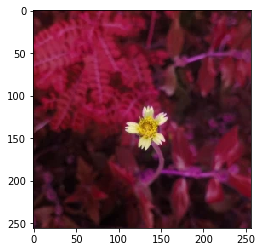

In [3]:
np_img = np.array(image.getdata()).reshape(image.size[1], image.size[0], 3)
print(np_img.shape)

## Display image 
plt.imshow(np_img)
plt.show()

In [4]:
def crop_center(img,cropx,cropy):
    y , x, _ = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx, :]

In [9]:
np_img = crop_center(np_img,50, 50)

In [10]:
np_img.shape

(50, 50, 3)

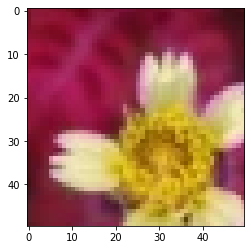

In [11]:
## Display image 
plt.imshow(np_img)
plt.show()

In [21]:
saliency_matrix = np.zeros((np_img.shape[0], np_img.shape[1]))

for curr_row in tqdm(range(np_img.shape[0])):
    for curr_col in range(np_img.shape[1]):
        curr_pixel = np_img[curr_row, curr_col]
        
        saliency_val = 0
        for row in range(np_img.shape[0]):
            for col in range(np_img.shape[1]):
                
                dist = np.linalg.norm(curr_pixel-np_img[row, col])
#                 print(dist)
                pos = math.exp(-(abs(curr_row - row)+ abs(curr_col - col))/50) 
#                 print(pos)
                saliency_val += (dist*pos)
#         print(saliency_val)
        saliency_matrix[curr_row, curr_col] = saliency_val
#         print(saliency_matrix[curr_row, curr_col] )

In [22]:
saliency_matrix.shape

(50, 50)

In [23]:
np.histogram(saliency_matrix.flatten())

(array([860, 552, 448, 288, 143, 110,  53,  34,   7,   5]),
 array([0.16209799, 1.118329  , 2.07456001, 3.03079102, 3.98702203,
        4.94325304, 5.89948405, 6.85571506, 7.81194607, 8.76817707,
        9.72440808]))

In [24]:
len(np.unique(saliency_matrix))

2500

In [25]:
final_saliency_matrix = saliency_matrix / np.max(saliency_matrix)

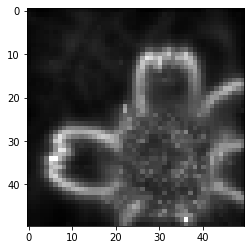

In [26]:
## Visualize the image mask
# plt.imshow(np_img)
plt.imshow(final_saliency_matrix, cmap='gray')
plt.show()